In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style='ticks', context='talk')
pd.set_option('use_inf_as_na', True)
pd.options.display.max_columns=200
pd.options.display.max_rows=300

In [3]:
from patchseq_utils import plotting as plot, regressions as reg, shiny, analysis as utils

In [4]:
from patchseq_utils import l1_load, util
from importlib import reload
reload(l1_load)
reload(util)

<module 'patchseq_utils.util' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/util.py'>

In [5]:
from patchseq_utils.l1_load import *
from patchseq_utils.util import *

# L1 type definitions

In [6]:
def plot_fractions_l1(inh_df, cluster, layer='layer', cutoff=0.02):
    proportions = inh_df[inh_df[layer].notna() & inh_df[layer].str.contains('1')][cluster].value_counts(normalize=True)
    proportions.name = 'Fraction of L1'
    df = proportions.loc[lambda df: df>cutoff]
    plt.figure(figsize=(4,3))
    sns.pointplot(x=df, y=df.index, join=False)
    plt.xlim(0,None)
    return proportions
    
def plot_proportion_l1(inh_df, cluster, layer='layer', cutoff=0.1, l1_factor=1, fillna=True):
    if fillna:
        inh_df = inh_df.copy()
        inh_df[layer] = inh_df[layer].fillna('')
    proportions = inh_df[inh_df[layer].notna()].groupby(cluster).apply(
        lambda df: df[layer].str.contains('1').sum() * l1_factor / 
        ((~df[layer].str.contains('1')).sum() + df[layer].str.contains('1').sum() * l1_factor) ).sort_values(ascending=False)
    proportions.name = 'Proportion of type in L1'
    df = proportions.loc[lambda df: df>cutoff]
    plt.figure(figsize=(4,3))
    sns.pointplot(x=df, y=df.index, join=False)
    plt.xlim(0,None)
    return proportions

def plot_proportion_layer(inh_df, cluster, l, layer='layer', cutoff=0.1, l1_factor=1, fillna=True):
    if fillna:
        inh_df = inh_df.copy()
        inh_df[layer] = inh_df[layer].fillna('')
    proportions = inh_df[inh_df[layer].notna()].groupby(cluster).apply(
        lambda df: df[layer].str.contains(l).sum() * l1_factor / 
        ((~df[layer].str.contains(l)).sum() + df[layer].str.contains('1').sum() * l1_factor) ).sort_values(ascending=False)
    proportions.name = f'Proportion of type in L{l}'
    df = proportions.loc[lambda df: df>cutoff]
    plt.figure(figsize=(4,3))
    sns.pointplot(x=df, y=df.index, join=False)
    plt.xlim(0,None)
    return proportions

In [6]:
thickness = [235, 295, 405, 370, 285, 552, 480]
density = [8333, 45563, 20964, 15090, 46167, 23076, 26774]
ref_counts = np.array(thickness) * np.array(density)
ref_counts = np.array([*ref_counts[:2], ref_counts[2:4].sum(), *ref_counts[4:]])

### FACS

In [11]:
facs_dir = "/allen/programs/celltypes/workgroups/rnaseqanalysis/shiny/facs_seq/MTG_paper_rev"
facs_df = shiny.load_shiny_data(None, directory=facs_dir, drop_offpipeline=False, nms_pass=False)


In [12]:
facs_df.groupby('external_donor_name').apply(lambda df: df.loc[
    lambda df: ~df.layer.str.contains('-'), 'layer']
                            .unique())
             # .value_counts(normalize=True, sort=True))

external_donor_name
H16.03.004                        [L5]
H16.06.002                        [L5]
H16.06.008                        [L5]
H16.06.009                        [L5]
H16.24.010    [L1, L2, L3, L4, L5, L6]
H200.1023     [L1, L4, L5, L2, L3, L6]
H200.1025     [L1, L5, L2, L4, L6, L3]
H200.1030     [L5, L4, L2, L3, L6, L1]
dtype: object

In [13]:
donors = ['H16.24.010', 'H200.1023', 'H200.1025', 'H200.1030']
facs_df = facs_df.loc[lambda df: 
                      df.external_donor_name.isin(donors)]
inh_df = facs_df.loc[facs_df['max.leaf.class']=='GABAergic']
human_facs = inh_df

In [41]:
counts = facs_df.layer.value_counts(normalize=True).sort_index().rename('facs').to_frame()
counts['defelipe'] = ref_counts / ref_counts.sum()
counts

,facs,defelipe
L1,0.070385,0.028705
L2,0.139302,0.197025
L3,0.228901,0.206299
L4,0.189472,0.192870
L5,0.193275,0.186718
L6,0.178664,0.188383


In [195]:
counts['facs'].iloc[2:4].sum() / counts['defelipe'].iloc[2:4].sum()

1.0481128627678278

Most counts match well if L1 dissection includes ~30% of L2 (despite stated oversampling of L1 and L6 also)

Inh L1 LAMP5 NMBR          0.314993
Inh L1-2 ADARB2 MC4R       0.107290
Inh L1-2 SST BAGE2         0.089409
Inh L1-2 PAX6 CDH12        0.085282
Inh L1 SST CHRNA4          0.066025
Inh L1-4 LAMP5 LCP2        0.063274
Inh L1-2 VIP PCDH20        0.045392
Inh L1-2 VIP TSPAN12       0.035763
Inh L1-2 VIP LBH           0.034388
Inh L1-2 LAMP5 DBP         0.023384
Inh L1-3 VIP ADAMTSL1      0.020633
Inh L1-3 SST CALB1         0.017882
Inh L1-3 VIP CHRM2         0.017882
Inh L2-4 PVALB WFDC2       0.012380
Inh L1-3 VIP SYT6          0.011004
Inh L2-6 LAMP5 CA1         0.011004
Inh L1-2 PAX6 TNFAIP8L3    0.009629
Inh L1-3 VIP GGH           0.006878
Name: Fraction of L1, dtype: float64

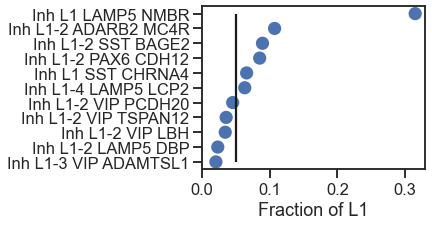

In [16]:
cluster = "cluster"
df = inh_df.copy()
frac = plot_fractions_l1(df, cluster)
plt.vlines(0.05, 0, 10, 'k')

frac.head(18)

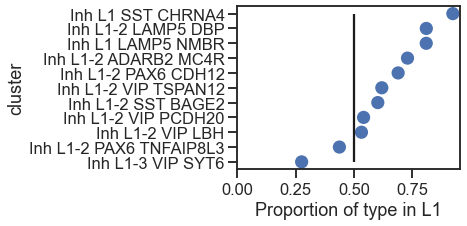

In [22]:
# prop = plot_proportion_l1(df, cluster, l1_factor=0.7)
prop = plot_proportion_l1(df, cluster, l1_factor=1, cutoff=0.25)
plt.vlines(0.5, 0, 10, 'k')

In [239]:
df.loc[lambda df: df[cluster].str.contains('LBH'),
      'layer'].value_counts(normalize=True, dropna=False)

L1    0.531915
L2    0.297872
L3    0.127660
L5    0.021277
L4    0.021277
Name: layer, dtype: float64

In [199]:
df.loc[lambda df: df[cluster].str.contains('TNFAIP'),
      'layer'].value_counts(normalize=True, dropna=False)

L1    0.4375
L2    0.3750
L5    0.1250
L3    0.0625
Name: layer, dtype: float64

In [240]:
df.loc[lambda df: df[cluster].str.contains('PENK'),
      'layer'].value_counts(normalize=True, dropna=False)

L3    0.529412
L4    0.235294
L2    0.117647
L1    0.058824
L6    0.058824
Name: layer, dtype: float64

In [200]:
df = frac.rename('frac').to_frame().join(prop.rename('prop'))
df.loc[(df.frac>0.05) | (df.prop>0.4)]

,frac,prop
Inh L1 LAMP5 NMBR,0.314993,0.809187
Inh L1-2 ADARB2 MC4R,0.107290,0.728972
Inh L1-2 SST BAGE2,0.089409,0.601852
Inh L1-2 PAX6 CDH12,0.085282,0.688889
Inh L1 SST CHRNA4,0.066025,0.923077
Inh L1-4 LAMP5 LCP2,0.063274,0.133721
Inh L1-2 VIP PCDH20,0.045392,0.540984
Inh L1-2 VIP TSPAN12,0.035763,0.619048
Inh L1-2 VIP LBH,0.034388,0.531915
Inh L1-2 LAMP5 DBP,0.023384,0.809524


In [201]:
# missing TNFAIP, adds SYT6, ADAMTS, LBH
list(frac.head(15).index.intersection(prop.head(15).index))

['Inh L1 LAMP5 NMBR',
 'Inh L1-2 ADARB2 MC4R',
 'Inh L1-2 SST BAGE2',
 'Inh L1-2 PAX6 CDH12',
 'Inh L1 SST CHRNA4',
 'Inh L1-4 LAMP5 LCP2',
 'Inh L1-2 VIP PCDH20',
 'Inh L1-2 VIP TSPAN12',
 'Inh L1-2 VIP LBH',
 'Inh L1-2 LAMP5 DBP',
 'Inh L1-3 VIP ADAMTSL1',
 'Inh L1-3 VIP SYT6']

### PS

In [243]:
shiny_human = get_shiny('human')
ps_df = shiny_human.join(human_depth, lsuffix="_shiny")
ps_df['target_layer'] = shiny_human.roi.fillna('').apply(get_num)

df = ps_df.query('tx_qc').copy()
cluster='topLeaf'

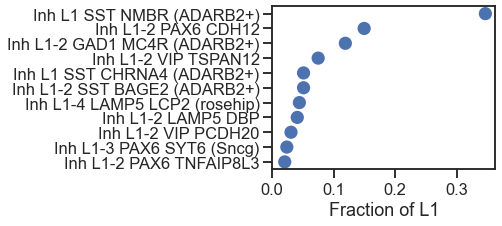

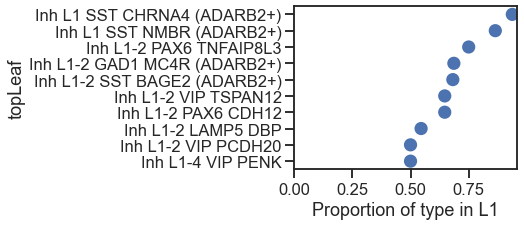

In [223]:
frac = plot_fractions_l1(df, cluster, layer='target_layer')
prop = plot_proportion_l1(df, cluster, layer='target_layer', 
                          l1_factor=1, cutoff=0.4, fillna=True)

In [225]:
# set cutoff at 3%
frac.head(15)

Inh L1 SST NMBR (ADARB2+)        0.346939
Inh L1-2 PAX6 CDH12              0.149660
Inh L1-2 GAD1 MC4R (ADARB2+)     0.119048
Inh L1-2 VIP TSPAN12             0.074830
Inh L1 SST CHRNA4 (ADARB2+)      0.051020
Inh L1-2 SST BAGE2 (ADARB2+)     0.051020
Inh L1-4 LAMP5 LCP2 (rosehip)    0.044218
Inh L1-2 LAMP5 DBP               0.040816
Inh L1-2 VIP PCDH20              0.030612
Inh L1-3 PAX6 SYT6 (Sncg)        0.023810
Inh L1-2 PAX6 TNFAIP8L3          0.020408
Inh L1-3 VIP ADAMTSL1            0.013605
Inh L1-4 VIP PENK                0.006803
Inh L1-4 VIP CHRNA6              0.006803
Inh L2-6 LAMP5 CA1 (Igtp)        0.003401
Name: Fraction of L1, dtype: float64

In [244]:
df.loc[lambda df: df[cluster].str.contains('TNFAIP'),
      'target_layer'].value_counts(normalize=False, dropna=False)

1    6
3    1
4    1
Name: target_layer, dtype: int64

In [235]:
df.loc[lambda df: df[cluster].str.contains('CDH20'),
      'target_layer'].value_counts(normalize=False, dropna=False)

1      9
2      4
NaN    4
4      1
Name: target_layer, dtype: int64

In [236]:
df.loc[lambda df: df[cluster].str.contains('PENK'),
      'target_layer'].value_counts(normalize=False, dropna=False)

1      2
2      1
NaN    1
Name: target_layer, dtype: int64

In [241]:
df = frac.rename('frac').to_frame().join(prop.rename('prop'))
df.loc[(df.frac>0.03) | (df.prop>0.5)]

,frac,prop
Inh L1 LAMP5 NMBR,0.314993,0.809187
Inh L1-2 ADARB2 MC4R,0.107290,0.728972
Inh L1-2 SST BAGE2,0.089409,0.601852
Inh L1-2 PAX6 CDH12,0.085282,0.688889
Inh L1 SST CHRNA4,0.066025,0.923077
Inh L1-4 LAMP5 LCP2,0.063274,0.133721
Inh L1-2 VIP PCDH20,0.045392,0.540984
Inh L1-2 VIP TSPAN12,0.035763,0.619048
Inh L1-2 VIP LBH,0.034388,0.531915
Inh L1-2 LAMP5 DBP,0.023384,0.809524


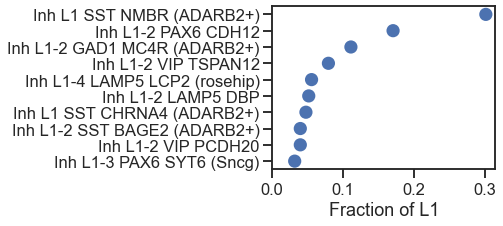

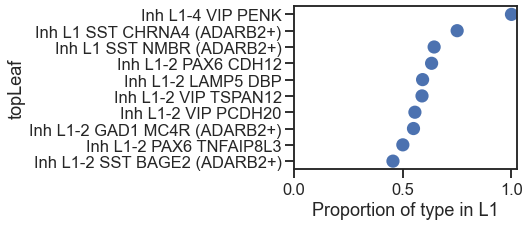

In [216]:
frac = plot_fractions_l1(df, cluster)
prop = plot_proportion_l1(df, cluster, l1_factor=1, cutoff=0.4)
# plot_proportion_l1(df, cluster, l1_factor=0.5, cutoff=0.2);

In [204]:
frac.head(15)

Inh L1 SST NMBR (ADARB2+)        0.301587
Inh L1-2 PAX6 CDH12              0.170635
Inh L1-2 GAD1 MC4R (ADARB2+)     0.111111
Inh L1-2 VIP TSPAN12             0.079365
Inh L1-4 LAMP5 LCP2 (rosehip)    0.055556
Inh L1-2 LAMP5 DBP               0.051587
Inh L1 SST CHRNA4 (ADARB2+)      0.047619
Inh L1-2 SST BAGE2 (ADARB2+)     0.039683
Inh L1-2 VIP PCDH20              0.039683
Inh L1-3 PAX6 SYT6 (Sncg)        0.031746
Inh L1-4 VIP PENK                0.015873
Inh L1-3 VIP ADAMTSL1            0.015873
Inh L1-2 PAX6 TNFAIP8L3          0.015873
Inh L2-6 LAMP5 CA1 (Igtp)        0.007937
Inh L1-2 VIP LBH                 0.007937
Name: Fraction of L1, dtype: float64

In [205]:
prop.head(15)
# PENK did not have deeper layers annotated, likely biased
#  maybe also borderline: LBH, ADAMTSL1, SYT6

topLeaf
Inh L1-4 VIP PENK                1.000000
Inh L1 SST CHRNA4 (ADARB2+)      0.750000
Inh L1 SST NMBR (ADARB2+)        0.644068
Inh L1-2 PAX6 CDH12              0.632353
Inh L1-2 LAMP5 DBP               0.590909
Inh L1-2 VIP TSPAN12             0.588235
Inh L1-2 VIP PCDH20              0.555556
Inh L1-2 GAD1 MC4R (ADARB2+)     0.549020
Inh L1-2 PAX6 TNFAIP8L3          0.500000
Inh L1-2 SST BAGE2 (ADARB2+)     0.454545
Inh L1-3 VIP ADAMTSL1            0.400000
Inh L1-4 LAMP5 LCP2 (rosehip)    0.297872
Inh L1-3 PAX6 SYT6 (Sncg)        0.296296
Inh L3-6 VIP HS3ST3A1            0.250000
Inh L1-2 VIP LBH                 0.222222
Name: Proportion of type in L1, dtype: float64

In [209]:
# confirms TNFAIP8L3, removes LBH
df = frac.rename('frac').to_frame().join(prop.rename('prop'))
df.loc[(df.frac>0.05) | (df.prop>=0.5)]

,frac,prop
Inh L1 SST NMBR (ADARB2+),0.301587,0.644068
Inh L1-2 PAX6 CDH12,0.170635,0.632353
Inh L1-2 GAD1 MC4R (ADARB2+),0.111111,0.549020
Inh L1-2 VIP TSPAN12,0.079365,0.588235
Inh L1-4 LAMP5 LCP2 (rosehip),0.055556,0.297872
Inh L1-2 LAMP5 DBP,0.051587,0.590909
Inh L1 SST CHRNA4 (ADARB2+),0.047619,0.750000
Inh L1-2 VIP PCDH20,0.039683,0.555556
Inh L1-4 VIP PENK,0.015873,1.000000
Inh L1-2 PAX6 TNFAIP8L3,0.015873,0.500000


In [207]:
list(frac.head(15).index.intersection(prop.head(15).index))

['Inh L1 SST NMBR (ADARB2+)',
 'Inh L1-2 PAX6 CDH12',
 'Inh L1-2 GAD1 MC4R (ADARB2+)',
 'Inh L1-2 VIP TSPAN12',
 'Inh L1-4 LAMP5 LCP2 (rosehip)',
 'Inh L1-2 LAMP5 DBP',
 'Inh L1 SST CHRNA4 (ADARB2+)',
 'Inh L1-2 SST BAGE2 (ADARB2+)',
 'Inh L1-2 VIP PCDH20',
 'Inh L1-3 PAX6 SYT6 (Sncg)',
 'Inh L1-4 VIP PENK',
 'Inh L1-3 VIP ADAMTSL1',
 'Inh L1-2 PAX6 TNFAIP8L3',
 'Inh L1-2 VIP LBH']

## Mouse

### FACS

In [7]:
facs_dir = "/allen/programs/celltypes/workgroups/rnaseqanalysis/shiny/facs_seq/Mm_VISp_AIT2.3.0_20047_202005"
facs_df = shiny.load_shiny_data(None, directory=facs_dir, drop_offpipeline=False, nms_pass=False)
facs_df = facs_df[facs_df['class']=="GABAergic"]

In [8]:
genotypes = [
    "Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt",
    "Gad2-IRES-Cre/wt;Ai14(RCL-tdT)/wt",
    "Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt"
]
slices = [f"CR00{x}" for x in [3,4,5,6,7]]
df = facs_df.loc[lambda df: df['genotype'].isin(genotypes)
                & df['slice'].isin(slices)
                ]
mouse_facs = df

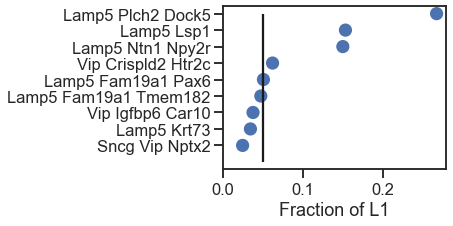

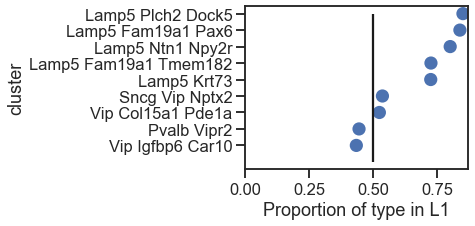

In [10]:
cluster='cluster'
frac = plot_fractions_l1(df, cluster, layer='layer', cutoff=0.02)
plt.vlines(0.05, 0, 9, 'k')
prop = plot_proportion_l1(df, cluster, layer='layer', l1_factor=1., cutoff=0.4)
plt.vlines(0.5, 0, 9, 'k')
# plot_proportion_l1(df, cluster, l1_factor=0.5, cutoff=0.2);

### PS

In [25]:
# very biased, not informative
mouse_df.query("layer=='1'").genotype.value_counts(normalize=True)

Ndnf-IRES2-dgCre/wt;Ai14(RCL-tdT)/wt                           0.280488
Ndnf-IRES2-dgCre/wt;Slc32a1-IRES2-FlpO/wt;Ai65(RCFL-tdT)/wt    0.256098
Sncg-IRES2-FlpO-neo/wt;Ai65F/wt                                0.134146
Gad2-IRES-Cre/wt;Ai14(RCL-tdT)/wt                              0.085366
Htr3a-Cre_NO152/wt;Ai14(RCL-tdT)/wt                            0.060976
Cck-IRES-Cre/wt;Vip-IRES-FlpO/wt;Ai65(RCFL-tdT)/wt             0.060976
Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt                           0.036585
Calb2-IRES-Cre/wt;Sst-IRES-FlpO/wt;Ai65(RCFL-tdT)/wt           0.024390
Vip-IRES-Cre/wt;Ai14(RCL-tdT)/wt                               0.012195
Nkx2-1-CreERT2/wt;Ai14(RCL-tdT)/wt                             0.012195
Nos1-CreERT2/wt;Sst-IRES-FlpO/wt;Ai65(RCFL-tdT)/wt             0.012195
Oxtr-T2A-Cre/wt;Ai14(RCL-tdT)/wt                               0.012195
Chrna2-Cre_OE25/wt;Ai14(RCL-tdT)/wt                            0.012195
Name: genotype, dtype: float64

In [33]:
# from l1_init
shiny_mouse = get_shiny('mouse')

# this filter or offpipeline (project code MET)
shiny_mouse = shiny_mouse.loc[
    lambda df:  
    (df['collection'] == "Patch-seq Production") &
    df['project_code'].isin(['mIVSCC-MET', 'mIVSCC-METx']) 
    & (df.structure.str.contains('VIS') | df.structure.str.contains('TEa'))
]
shiny_mouse['target_layer'] = shiny_mouse.layer.fillna('').apply(get_num)
shiny_mouse.drop(columns=['layer'], inplace=True)

shiny_mouse['layer_ccf'] = shiny_mouse['structure'].fillna('').apply(get_num)

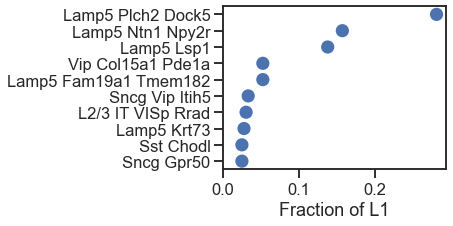

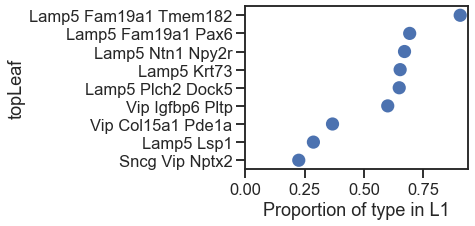

In [34]:
df = shiny_mouse
cluster='topLeaf'
layer='layer_ccf'
# layer='layer_lims'
frac = plot_fractions_l1(df, cluster, layer=layer, cutoff=0.02)
prop = plot_proportion_l1(df, cluster, layer=layer, l1_factor=1.5, cutoff=0.2)
# plot_proportion_l1(df, cluster, l1_factor=0.5, cutoff=0.2);

In [35]:
frac.head(15)

Lamp5 Plch2 Dock5        0.281768
Lamp5 Ntn1 Npy2r         0.157459
Lamp5 Lsp1               0.138122
Vip Col15a1 Pde1a        0.052486
Lamp5 Fam19a1 Tmem182    0.052486
Sncg Vip Itih5           0.033149
L2/3 IT VISp Rrad        0.030387
Lamp5 Krt73              0.027624
Sst Chodl                0.024862
Sncg Gpr50               0.024862
Sncg Vip Nptx2           0.019337
Lamp5 Fam19a1 Pax6       0.016575
Pvalb Tpbg               0.013812
Sst Calb2 Pdlim5         0.011050
Vip Pygm C1ql1           0.011050
Name: Fraction of L1, dtype: float64

In [36]:
df = frac.rename('frac').to_frame().join(prop.rename('prop'))
df.loc[(df.frac>0.05) | (df.prop>0.5)]
# have to go down to prop<0.25 or combine types to include Sncg

,frac,prop
Lamp5 Plch2 Dock5,0.281768,0.648305
Lamp5 Ntn1 Npy2r,0.157459,0.670588
Lamp5 Lsp1,0.138122,0.287356
Vip Col15a1 Pde1a,0.052486,0.367742
Lamp5 Fam19a1 Tmem182,0.052486,0.904762
Lamp5 Krt73,0.027624,0.652174
Lamp5 Fam19a1 Pax6,0.016575,0.692308
Vip Igfbp6 Pltp,0.002762,0.600000


In [ ]:
list(frac.head(15).index.intersection(prop.head(15).index))

## PENK cells

Actually in L1? not sure why one missing from dataset...

In [ ]:
df[df[cluster].str.contains('PENK')].layer.str.contains('1').value_counts(dropna=False)

In [ ]:
human_df = pd.read_csv("~/projects/human_l1/human_l1_dataset_full_2021_10_25.csv", index_col=0)
human_df.loc[lambda df: df[cluster].str.contains('PENK')]

In [ ]:
df.loc[lambda df: df[cluster].str.contains('PENK')]

# Cross-area human

In [9]:
path = "/allen/programs/celltypes/workgroups/rnaseqanalysis/Nik/human_cross_areal_comparison_SSv4/Integrated_analysis/Integrated_tome_with_3_cluster_labels/human_20190626_Cross_areal"
facs_df = shiny.load_shiny_data(None, directory=path, drop_offpipeline=False, nms_pass=False)

In [10]:
cluster = "MTG_cluster"
region = "region"
layer = "layer"
areas = ['MTG', 'MOp', 'VISp']
facs_df['type'] = facs_df[cluster].map(shorten_name).map(names_update).astype(ttypes_human)
facs_df['area'] = facs_df[region].apply(lambda x: x.split('-')[0])
facs_df[layer] = facs_df[layer].astype(int)
facs_df['subclass'] = facs_df['type'].map(homology_mapping_human)

df = facs_df.loc[lambda df: df['type'].isin(l1_types_human) 
                      & df['area'].isin(areas)]

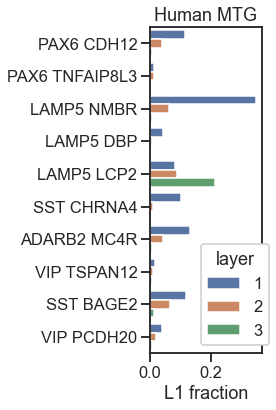

In [12]:
fig, ax = plt.subplots(figsize=(2,6))
ax.set_title('Human MTG')
area = 'MTG'

data = df.query(f"area=='{area}'")
l1_count = len(data.query("layer==1"))
results = data.groupby('type', observed=True).layer.value_counts(normalize=False, dropna=False)
results = results.unstack().reindex(ttypes_human.categories).loc[:,[1,2,3]].fillna(0) / l1_count + 0.001
bardata = results.stack().reset_index()
sns.barplot(data=bardata, y='type', x=0, hue='layer', ax=ax)
ax.set_xlabel('L1 fraction')
ax.set_ylabel('')
# ax.set_xlim(0, 0.4)
ax.legend(bbox_to_anchor=(0.38,0), loc="lower left", title='layer', framealpha=1)

Text(0, 0.5, '')

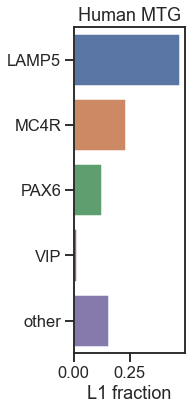

In [13]:
fig, ax = plt.subplots(figsize=(2,6))
ax.set_title('Human MTG')
area = 'MTG'
group='subclass'
layers = [1,2,3]
layers = [1]

data = df.query(f"area=='{area}'")
l1_count = len(data.query("layer==1"))
results = data.groupby(group, observed=True).layer.value_counts(normalize=False, dropna=False)
results = results.unstack().loc[:,layers].fillna(0) / l1_count + 0.001
bardata = results.stack().reset_index()
sns.barplot(data=bardata, y=group, x=0, ax=ax)
ax.set_xlabel('L1 fraction')
ax.set_ylabel('')

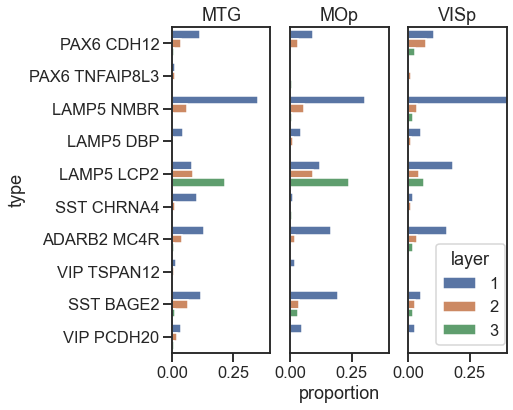

In [14]:
fig, axs = plt.subplots(1,3, figsize=(6,6))
for i, area in enumerate(areas):
    ax=axs[i]
    ax.set_title(area)
    data = df.query(f"area=='{area}'")
    l1_count = len(data.query("layer==1"))
    results = data.groupby('type', observed=True).layer.value_counts(normalize=False, dropna=False)
    results = results.unstack().reindex(ttypes_human.categories).loc[:,[1,2,3]].fillna(0) / l1_count + 0.001
    bardata = results.stack().reset_index()
    sns.barplot(data=bardata, y='type', x=0, hue='layer', ax=ax)
    ax.get_legend().remove()
    ax.set_xlabel('')
    ax.set_xlim(0, 0.4)
#     ax.set_xscale('log')
#     ax.set_xlim(1e-3, 1)
#     ax.set_xticks([0.01, 0.05, 0.1, 0.25])
    if i>0:
        ax.set_yticks([])
        ax.set_ylabel('')
    if i==1:
        ax.set_xlabel('proportion')
    if i==2:
        ax.legend(bbox_to_anchor=(0.2,0), loc="lower left", title='layer')
        
plt.savefig(figdir/"crossarea_layer_dist_human.pdf", bbox_inches='tight')

# Cross-area mouse

In [15]:
# CTX-Hip dataset only has tasic annotations on part...
path = "/allen/programs/celltypes/workgroups/rnaseqanalysis/shiny/facs_seq/mouse_CTX_HIP_20200915/"
# path = "/allen/programs/celltypes/workgroups/rnaseqanalysis/shiny/facs_seq/mouse_CTX_HIP_20190702/"
# path = "/allen/programs/celltypes/workgroups/rnaseqanalysis/shiny/10x_seq/mouse_CTX_HIP_20190702/"
facs_df = shiny.load_shiny_data(None, directory=path, drop_offpipeline=False, nms_pass=False)

path = "/allen/programs/celltypes/workgroups/rnaseqanalysis/shiny/tomes/multi_method/CTX_HIP_202009/smrt_anno.RData"
facs_df = shiny.load_shiny_data(None, rda_path=path, drop_offpipeline=False, nms_pass=False)

cluster = "tasic18_cluster"
region = "region"
layer = "layer"
areas = ['MOp', 'VISp', 'SSp']
facs_df['type'] = facs_df[cluster].astype(ttypes_mouse)
facs_df['area'] = facs_df[region]
facs_df[layer] = facs_df['roi'].apply(lambda x: x.split('_')[-1])

In [16]:
# start here
path = "/allen/programs/celltypes/workgroups//rnaseqanalysis/shiny/facs_seq/mouse_V1_ALM_20180520/"
facs_df = shiny.load_shiny_data(None, directory=path, drop_offpipeline=False, nms_pass=False)

In [17]:
cluster = "cluster"
region = "region"
layer = "layer"
areas = ['VISp', 'ALM']
facs_df['type'] = facs_df[cluster].astype(ttypes_mouse)
facs_df['area'] = facs_df[region]
facs_df['subclass'] = facs_df['type'].map(homology_mapping_mouse)

In [18]:
facs_df.groupby('slice').apply(lambda df: df.loc[
    lambda df: ~df.layer.str.contains('-'), 'layer'].unique())

slice
CR001                        [L6, L4]
CR002                    [L5, L6, L1]
CR003          [L2/3, L4, L5, L6, L1]
CR004     [L2/3, L4, L6, L1, L5, L6b]
CR005     [L5, L6, L2/3, L4, L1, L6b]
CR006          [L1, L5, L6, L2/3, L4]
CR007          [L6, L1, L5, L2/3, L4]
CR008                  [L4, L2/3, L5]
CRVISp                          [L6b]
RC001                        [L1, L6]
RC002              [L1, L6, L2/3, L5]
RC003              [L1, L6, L5, L2/3]
RC004         [L5, L6, L2/3, L1, L6b]
RC005              [L5, L6, L2/3, L1]
RC006         [L2/3, L5, L6, L1, L6b]
RC007         [L5, L2/3, L6, L1, L6b]
RC008                  [L2/3, L6, L5]
RC009                  [L2/3, L1, L5]
RCALM                              []
dtype: object

In [19]:
l1_df = facs_df.loc[lambda df: df['type'].isin(l1_types_mouse) ]
l1_df.loc[lambda df: df.cluster.str.contains('Krt73'), 'genotype'].value_counts(normalize=True)

Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt       0.352941
Gad2-IRES-Cre/wt;Ai14(RCL-tdT)/wt          0.352941
Slc17a8-IRES2-Cre/wt;Ai14(RCL-tdT)/wt      0.102941
Rasgrf2-T2A-dgFlpO/wt;Ai65F(RCF-tdT)/wt    0.058824
Slc17a8-iCre/wt;Ai14(RCL-tdT)/wt           0.044118
Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt       0.044118
Htr3a-Cre_NO152/wt;Ai14(RCL-tdT)/wt        0.029412
Chat-IRES-Cre-neo/wt;Ai14(RCL-tdT)/wt      0.014706
Name: genotype, dtype: float64

In [20]:
genotypes = [
    "Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt",
    "Gad2-IRES-Cre/wt;Ai14(RCL-tdT)/wt",
    "Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt"
]

slices = ([f"CR00{x}" for x in [3,4,5,6,7]] +
          [f"RC00{x}" for x in [2,3,4,5,6,7,9]])
df = l1_df.loc[lambda df: df['genotype'].isin(genotypes)
                & df['slice'].isin(slices)
                ]

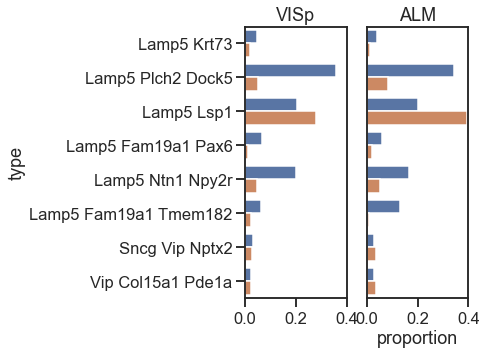

In [21]:
fig, axs = plt.subplots(1,2, figsize=(4,5))
for i, area in enumerate(areas):
    ax=axs[i]
    ax.set_title(area)
    data = df.query(f"area=='{area}'")
    l1_count = len(data.query("layer=='L1'"))
    results = data.groupby('type', observed=True).layer.value_counts(normalize=False, dropna=False)
    results = results.unstack().reindex(ttypes_mouse.categories).loc[:,['L1','L2/3']].fillna(0) / l1_count
    bardata = results.stack().reset_index()
    sns.barplot(data=bardata, y='type', x=0, hue='layer', ax=ax)
    ax.get_legend().remove()
    ax.set_xlabel('')
    ax.set_xlim(0, 0.4)
#     ax.set_xscale('log')
#     ax.set_xlim(1e-3, 1)
#     ax.set_xticks([0.01, 0.05, 0.1, 0.25])
    if i>0:
        ax.set_yticks([])
        ax.set_ylabel('')
    if i==1:
        ax.set_xlabel('proportion')
#     if i==0:
#         ax.legend(bbox_to_anchor=(0.1,0), loc="lower left", title='layer')

plt.savefig(figdir/"crossarea_layer_dist_mouse.pdf", bbox_inches='tight')

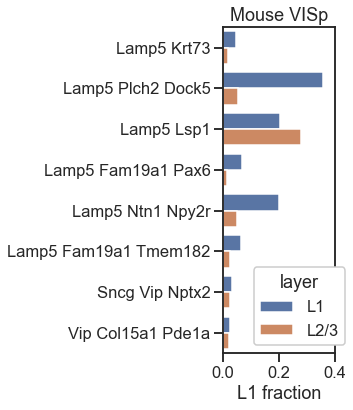

In [22]:
fig, ax = plt.subplots(figsize=(2,6))
ax.set_title('Mouse VISp')
area = 'VISp'

data = df.query(f"area=='{area}'")
l1_count = len(data.query("layer=='L1'"))
results = data.groupby('type', observed=True).layer.value_counts(normalize=False, dropna=False)
results = results.unstack().reindex(ttypes_mouse.categories).loc[:,['L1','L2/3']].fillna(0) / l1_count
bardata = results.stack().reset_index()
sns.barplot(data=bardata, y='type', x=0, hue='layer', ax=ax)
ax.get_legend().remove()
ax.set_xlabel('L1 fraction')
ax.set_ylabel('')
ax.set_xlim(0, 0.4)
ax.legend(bbox_to_anchor=(0.2,0), loc="lower left", title='layer', framealpha=1)

# Subclass proportions comparison

Text(0, 0.5, '')

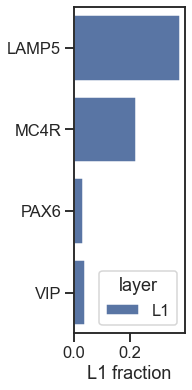

In [24]:
fig, ax = plt.subplots(figsize=(2,6))
# ax.set_title('Human MTG')
area = 'VISp'
group='subclass'
layers = ['L1']

df = facs_df.loc[lambda df: df['genotype'].isin(genotypes)
                & df['slice'].isin(slices)
                ]
# df[group] = df[group].fillna('other t-types')
data = df.query(f"area=='{area}'")
l1_count = len(data.query(f"layer=='{layers[0]}'"))
results = data.groupby(group, observed=True).layer.value_counts(normalize=False, dropna=False)
results = results.unstack().loc[:,layers].fillna(0) / l1_count + 0.001
bardata = results.stack().reset_index()
sns.barplot(data=bardata, y=group, x=0, hue='layer', ax=ax)
ax.set_xlabel('L1 fraction')
ax.set_ylabel('')